In [35]:
from skimage import color, io, measure, img_as_ubyte
from skimage.measure import profile_line
from skimage.transform import rescale, resize
import matplotlib.pyplot as plt
import numpy as np
import pydicom as dicom

In [36]:
# Directory containing data and images
in_dir = "data/"

# X-ray image
im_name = "metacarpals.png"

# Read the image.
# Here the directory and the image name is concatenated
# by "+" to give the full path to the image.
im_org = io.imread(in_dir + im_name)

In [37]:
print(im_org.shape)
print(im_org.dtype)

(512, 512)
uint8


/tmp/ipykernel_68698/97111588.py:1: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(im_org)
/tmp/ipykernel_68698/97111588.py:3: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.show()


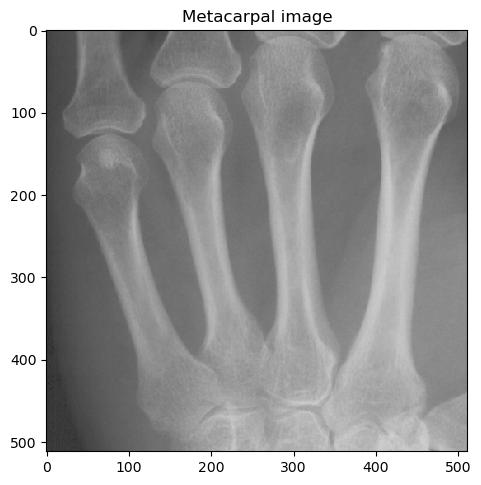

In [38]:
io.imshow(im_org)
plt.title('Metacarpal image')
io.show()

/tmp/ipykernel_68698/4079791536.py:1: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(im_org, cmap="terrain")
/tmp/ipykernel_68698/4079791536.py:3: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.show()


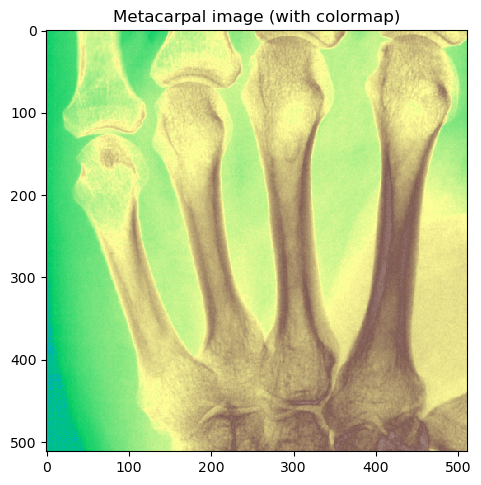

In [39]:
io.imshow(im_org, cmap="terrain")
plt.title('Metacarpal image (with colormap)')
io.show()

/tmp/ipykernel_68698/2386785184.py:1: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(im_org, vmin=im_org.min(), vmax=im_org.max())
/tmp/ipykernel_68698/2386785184.py:3: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.show()


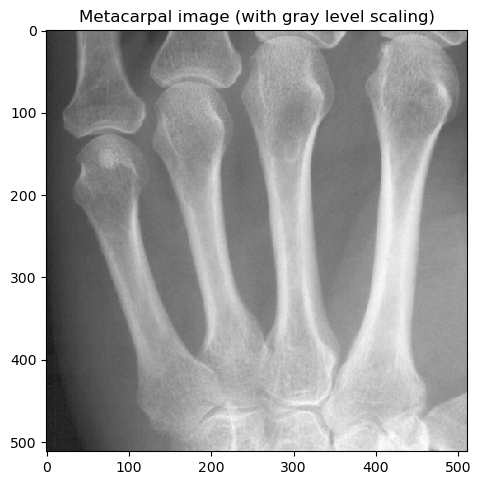

In [40]:
io.imshow(im_org, vmin=im_org.min(), vmax=im_org.max())
plt.title('Metacarpal image (with gray level scaling)')
io.show()

/tmp/ipykernel_68698/2584199610.py:3: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.show()


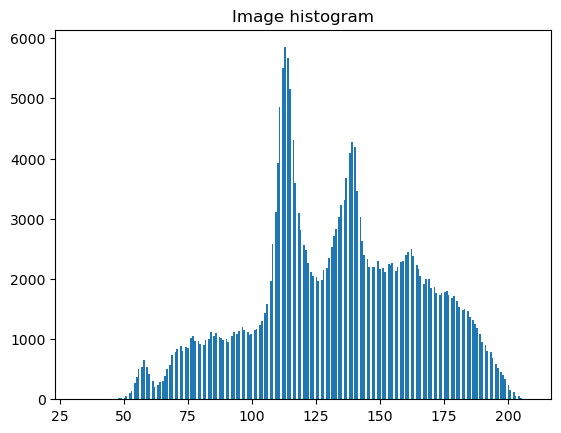

In [41]:
plt.hist(im_org.ravel(), bins=256)
plt.title('Image histogram')
io.show()

There are 1147.0 pixel values in bin 100


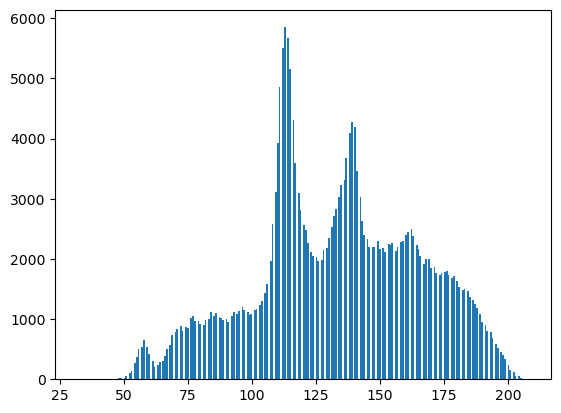

In [42]:
h = plt.hist(im_org.ravel(), bins=256)
bin_no = 100
count = h[0][bin_no]
print(f"There are {count} pixel values in bin {bin_no}")

In [43]:
bin_left = h[1][bin_no]
bin_right = h[1][bin_no + 1]
print(f"Bin edges: {bin_left} to {bin_right}")

Bin edges: 100.75 to 101.4375


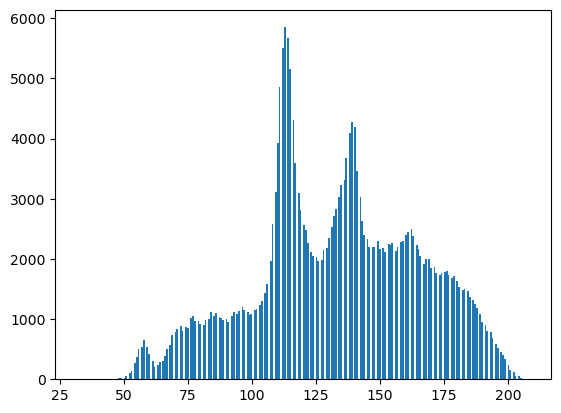

In [44]:
y, x, _ = plt.hist(im_org.ravel(), bins=256)

In [45]:
most_common_idx = h[0].argmax()
print(f"most common: {most_common_idx} with {h[0][most_common_idx]} pixels")

most common: 117 with 5848.0 pixels


In [46]:
r = 100
c = 50
im_val = im_org[r, c]
print(f"The pixel value at (r,c) = ({r}, {c}) is: {im_val}")

The pixel value at (r,c) = (100, 50) is: 108


/tmp/ipykernel_68698/2289077098.py:2: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(mask)
/tmp/ipykernel_68698/2289077098.py:3: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.show()


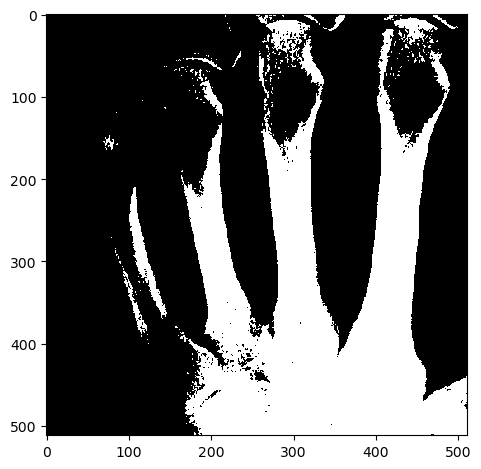

In [47]:
mask = im_org > 150
io.imshow(mask)
io.show()

/tmp/ipykernel_68698/3122219897.py:2: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(im_org)
/tmp/ipykernel_68698/3122219897.py:3: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.show()


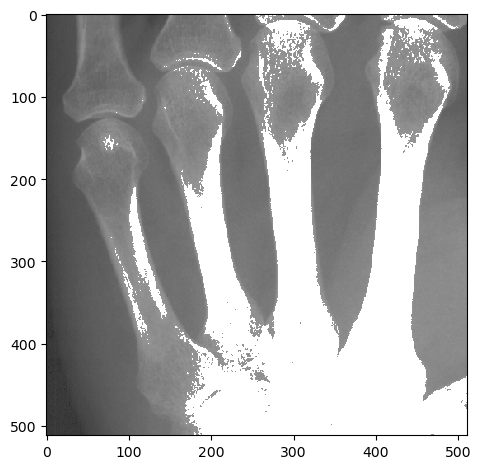

In [48]:
im_org[mask] = 255
io.imshow(im_org)
io.show()

In [49]:
# Directory containing data and images
in_dir = "data/"

# X-ray image
im_name = "ardeche.jpg"

# Read the image.
# Here the directory and the image name is concatenated
# by "+" to give the full path to the image.
im_col = io.imread(in_dir + im_name)

In [50]:
print(im_col.dtype)
print(im_col.shape)

uint8
(600, 800, 3)


/tmp/ipykernel_68698/3430089020.py:1: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(im_col)
/tmp/ipykernel_68698/3430089020.py:2: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.show()


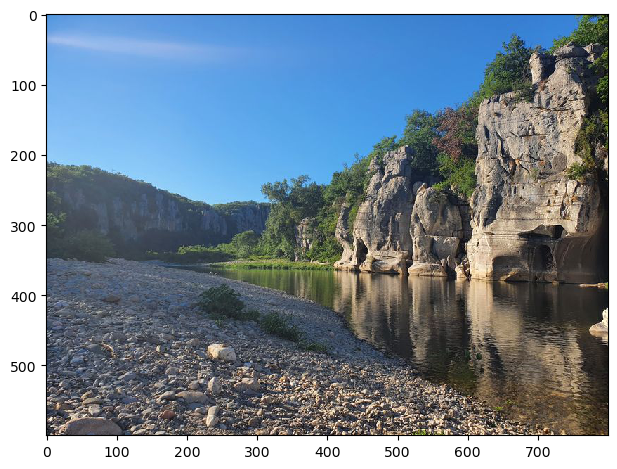

In [52]:
io.imshow(im_col)
io.show()

In [55]:
print(im_col[110,90])

[119 178 238]


/tmp/ipykernel_68698/1188222638.py:3: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(im_col)


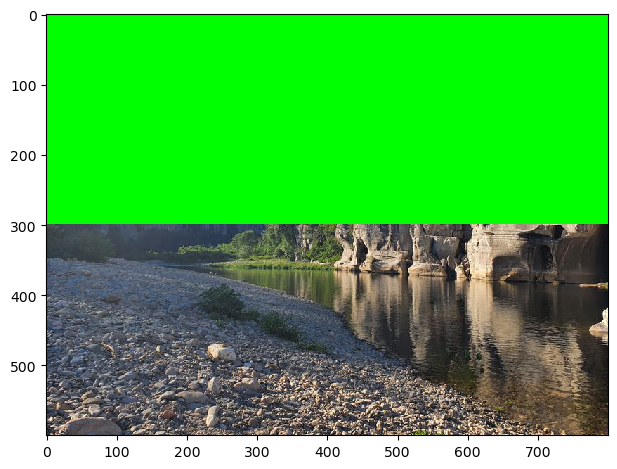

In [59]:
height = im_col.shape[0]/2
im_col[:int(height)] = (0,255,0)
io.imshow(im_col)

In [61]:
image_rescaled = rescale(im_col, 0.25, anti_aliasing=True,
                         channel_axis=2)

/tmp/ipykernel_68698/2150301434.py:2: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(im_dtu)


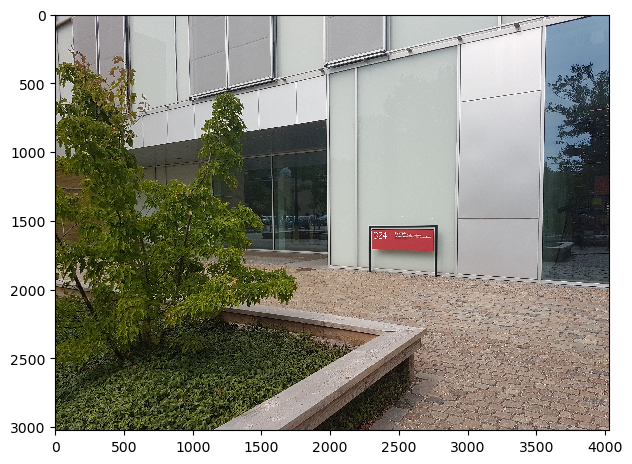

In [62]:
im_dtu = io.imread("data/DTUSign1.jpg")
io.imshow(im_dtu)

/tmp/ipykernel_68698/2147240398.py:2: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(r_comp)
/tmp/ipykernel_68698/2147240398.py:4: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.show()


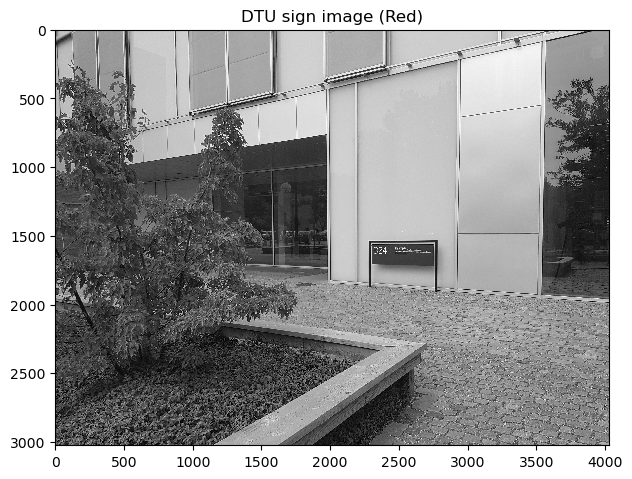

In [67]:
r_comp = im_dtu[:, :, 1]
io.imshow(r_comp)
plt.title('DTU sign image (Red)')
io.show()

/tmp/ipykernel_68698/2324717425.py:2: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(im_dtu)


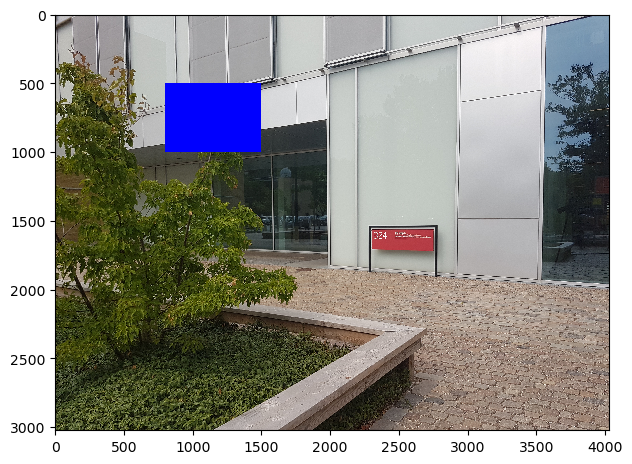

In [72]:
im_dtu[500:1000, 800:1500, :] = (0,0,255)
io.imshow(im_dtu)


/tmp/ipykernel_68698/3982061020.py:2: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(im_bones)


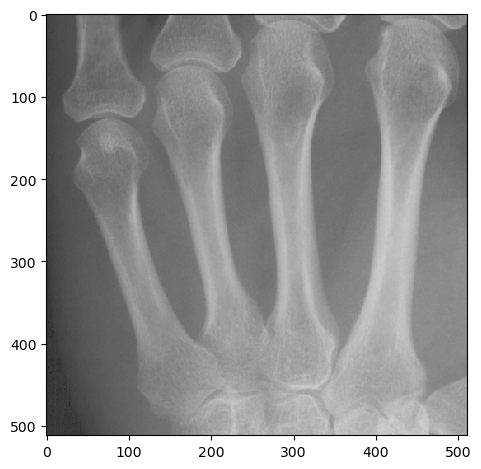

In [73]:
im_bones = io.imread("data/metacarpals.png")
io.imshow(im_bones)

/tmp/ipykernel_68698/2897966031.py:2: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(mask)


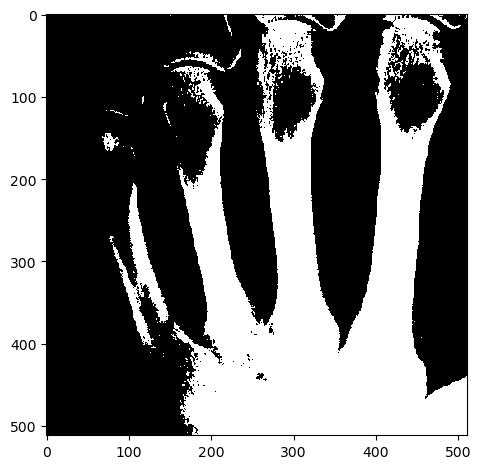

In [80]:
mask = im_bones > 145
io.imshow(mask)

/tmp/ipykernel_68698/3791275442.py:3: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(im_tagged)


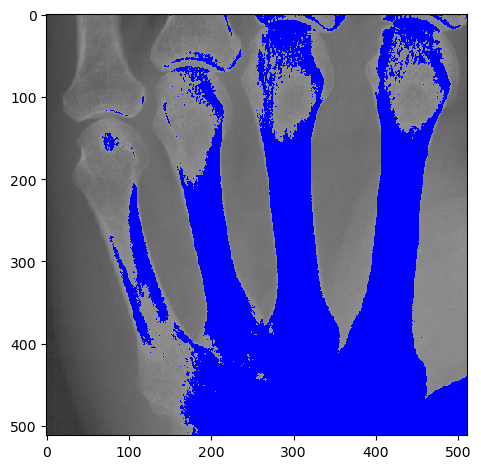

In [83]:
im_tagged = color.gray2rgb(im_bones)
im_tagged[mask] = (0,0,255)
io.imshow(im_tagged)

/tmp/ipykernel_68698/1319534722.py:2: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(im_xray)


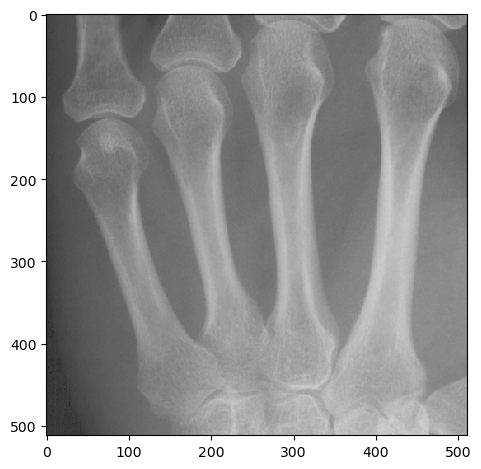

In [84]:
im_xray = io.imread("data/metacarpals.png")
io.imshow(im_xray)


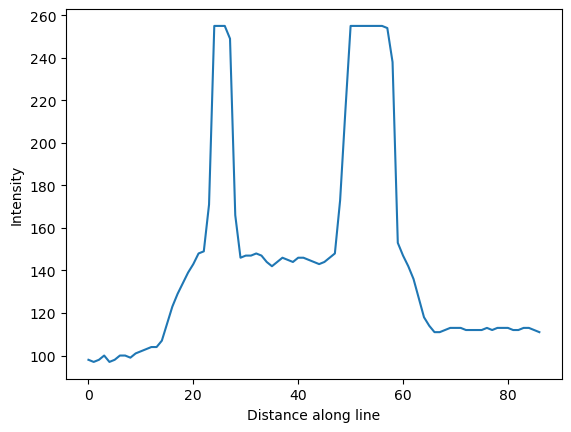

In [85]:
p = profile_line(im_org, (342, 77), (320, 160))
plt.plot(p)
plt.ylabel('Intensity')
plt.xlabel('Distance along line')
plt.show()

In [86]:
print(f"Max is: {p.max()}")

Max is: 255.0


/tmp/ipykernel_68698/2108545648.py:4: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(im_org)
/tmp/ipykernel_68698/2108545648.py:5: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.show()


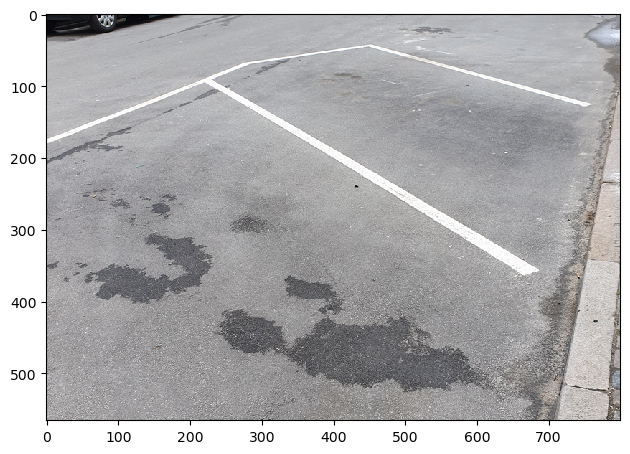

/tmp/ipykernel_68698/2108545648.py:7: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(im_gray)
/tmp/ipykernel_68698/2108545648.py:8: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.show()


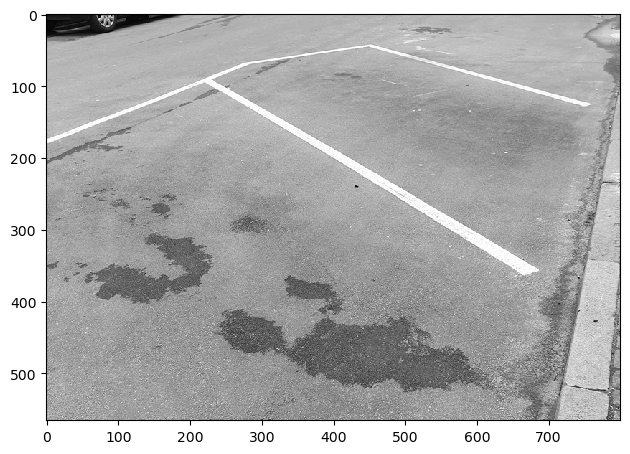

In [94]:
in_dir = "data/"
im_name = "road.png"
im_org = io.imread(in_dir + im_name)
io.imshow(im_org)
io.show()
im_gray = color.rgb2gray(im_org)
io.imshow(im_gray)
io.show()

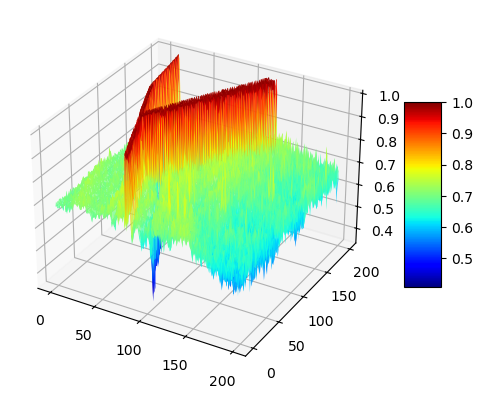

In [90]:
ll = 200
im_crop = im_gray[40:40 + ll, 150:150 + ll]
xx, yy = np.mgrid[0:im_crop.shape[0], 0:im_crop.shape[1]]
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(xx, yy, im_crop, rstride=1, cstride=1, cmap=plt.cm.jet,
                       linewidth=0)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

In [95]:
in_dir = "data/"
im_name = "1-442.dcm"
ds = dicom.dcmread(in_dir + im_name)
print(ds)

Dataset.file_meta -------------------------------
(0002,0000) File Meta Information Group Length  UL: 174
(0002,0001) File Meta Information Version       OB: b'\x00\x01'
(0002,0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002,0003) Media Storage SOP Instance UID      UI: 61.7.148187188172271071649499494197343400503
(0002,0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002,0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002,0013) Implementation Version Name         SH: 'dcm4che-1.4.34'
-------------------------------------------------
(0008,0008) Image Type                          CS: ['DERIVED', 'SECONDARY']
(0008,0016) SOP Class UID                       UI: CT Image Storage
(0008,0018) SOP Instance UID                    UI: 61.7.148187188172271071649499494197343400503
(0008,0020) Study Date                          DA: '20140914'
(0008,0030) Study Time                          TM: ''
(0008,0050) Accession Number        

/tmp/ipykernel_68698/4158403106.py:2: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(im,vmin=-1000, vmax=1000,cmap="gray")
/tmp/ipykernel_68698/4158403106.py:3: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.show()


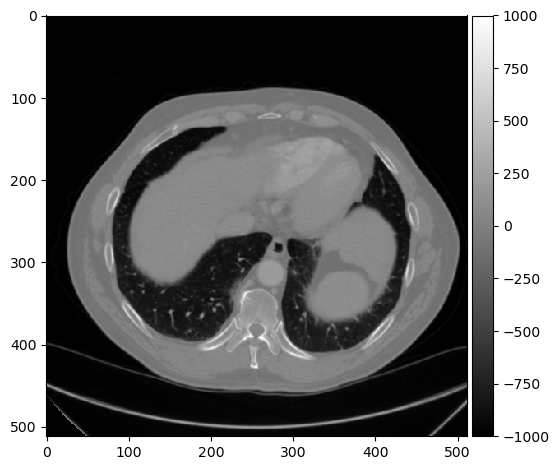

In [105]:
im = ds.pixel_array
io.imshow(im,vmin=-1000, vmax=1000,cmap="gray")
io.show()

In [100]:
print(im.shape)
print(im.dtype)

(512, 512)
int16
